In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


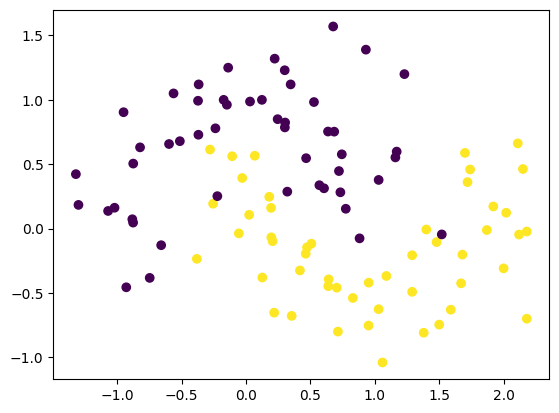

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

# Xavier/Glorat Weight Initialization(Normal)

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 0.12524354,  0.6810196 ,  0.23300076, -0.5454497 , -0.4507248 ,
         -0.2363742 , -0.40013188, -0.01809752, -0.1785971 ,  0.62959784],
        [-0.11907613, -0.45826268, -0.31900275,  0.5152032 ,  0.64582056,
         -0.358114  ,  0.11399812, -0.15071833, -0.66568065,  0.10797113]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.01014334, -0.37028143, -0.0429405 , -0.12501639,  0.36082   ,
         -0.19088343,  0.38425428,  0.5127547 ,  0.11544359,  0.19494075],
        [ 0.199597  , -0.00965768, -0.3152248 , -0.5249423 ,  0.5437839 ,
         -0.5402688 , -0.42416406,  0.46628928,  0.28330564,  0.29079753],
        [-0.43242005, -0.4861657 , -0.4375383 , -0.39023632,  0.06062824,
          0.01774406, -0.13685152,  0.46706092, -0.5456661 ,  0.13904095],
        [ 0.31713766,  0.25777882,  0.4100114 , -0.31097746,  0.38602686,
          0.39995557,  0.2027666 ,  0.22761434,  0.52448845, -0.45207748],
        [-0.52605

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[ 0.94505507,  0.08731986,  0.69000906, -1.194806  ,  0.25114417,
         -0.5629481 , -0.9165466 , -0.6642901 ,  0.09274936, -1.0816721 ],
        [ 0.66427433, -1.0829968 , -0.3707922 ,  0.9707048 , -0.3297712 ,
         -0.31420583, -0.8019209 , -1.3735977 , -0.61518806,  0.11894254]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-4.8290533e-01, -3.1937742e-01, -1.3818604e-01,  4.5835450e-01,
          6.7043595e-02, -3.8276933e-02, -5.0538540e-01,  2.3500414e-01,
         -4.9402726e-01, -1.0056647e-01],
        [ 1.2340024e-01, -1.2886001e-01, -6.4929020e-01, -6.3189514e-02,
          2.0757073e-01, -9.4914816e-02, -1.7184246e-01, -5.7439137e-02,
         -4.6268588e-01,  3.2995349e-01],
        [-3.8250715e-01,  2.0019120e-01,  1.3335866e-01, -4.9680415e-01,
         -1.0097796e-01,  3.6741719e-02, -3.4321046e-01,  1.8792281e-01,
         -4.6431339e-01,  2.7835128e-01],
        [-1.5216497e-01,  2.7232913e-02, -4.96149

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.5242 - loss: 0.7212 - val_accuracy: 0.7000 - val_loss: 0.6295
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5273 - loss: 0.7286 - val_accuracy: 0.7000 - val_loss: 0.6170
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5469 - loss: 0.7053 - val_accuracy: 0.7500 - val_loss: 0.6051
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5156 - loss: 0.6989 - val_accuracy: 0.7500 - val_loss: 0.5938
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5688 - loss: 0.6729 - val_accuracy: 0.7500 - val_loss: 0.5827
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6109 - loss: 0.6548 - val_accuracy: 0.8000 - val_loss: 0.5723
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.5797 - loss: 0.6578 - val_accuracy: 0.8500 - val_loss: 0.5623
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6391 - loss: 0.6401 - val_accuracy: 0.8000 - va

In [15]:
model.get_weights()

[array([[ 0.9713999 ,  0.06662026,  0.529634  , -0.9286837 ,  0.24246356,
         -0.6323127 , -1.0257266 , -0.75047445,  0.16098031, -0.98626757],
        [ 0.5503234 , -1.1652528 , -0.5325671 ,  1.1557436 , -0.4323637 ,
         -0.27735347, -0.77925205, -1.3794414 , -0.613923  ,  0.18993838]],
       dtype=float32),
 array([-0.18031159, -0.09467553, -0.16539644,  0.11037404, -0.03409768,
        -0.15847617,  0.18084238, -0.16359194,  0.1936942 , -0.16408162],
       dtype=float32),
 array([[-0.4474823 , -0.29618692, -0.00575814,  0.45951268,  0.16659449,
          0.11996464, -0.4888246 ,  0.33350733, -0.3660484 , -0.11077887],
        [ 0.08238734, -0.07655496, -0.59232944, -0.01450094,  0.20369141,
         -0.17331184, -0.12919077, -0.14630692, -0.56163263,  0.28727442],
        [-0.3640992 ,  0.3329879 ,  0.20845383, -0.45977142, -0.08239751,
          0.01078576, -0.22502051,  0.07082899, -0.58979326,  0.20451194],
        [-0.13848877, -0.06334023, -0.13174216,  0.20246671, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

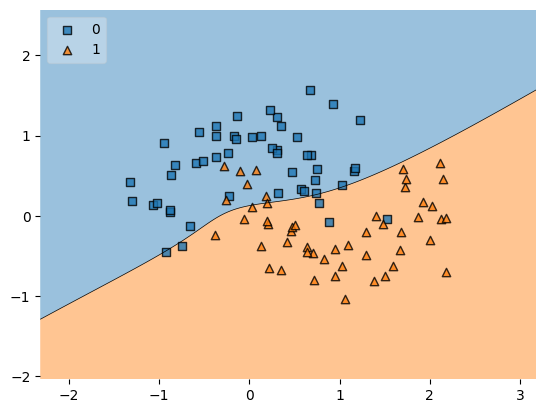

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# He Weight Initialization(Normal)

In [17]:
model1 = Sequential()

model1.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model1.get_weights()

[array([[ 1.3435532 , -1.6156985 ,  1.2770965 , -1.6838081 , -1.5045116 ,
          0.16345848, -0.2621052 ,  0.93432605, -1.4882252 , -0.95442057],
        [ 0.17333801,  0.88466066, -0.39683586,  0.23304506,  0.8607258 ,
         -1.3462352 ,  0.9143473 ,  1.1234372 ,  0.9856961 , -0.11039921]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.28855914,  0.8967488 , -0.409617  ,  0.70459366,  0.32836106,
          0.37096152, -0.09132865, -0.51924205,  0.86165524,  0.30811372],
        [-0.36383882, -0.81196445,  0.22809023, -0.82411605, -0.41961578,
         -0.17727302, -0.31209764, -0.14100337,  0.875142  , -0.12017262],
        [ 0.29292187,  0.55165654,  0.05171958, -0.5927142 , -0.03773964,
         -0.881518  ,  0.16139816, -0.73633415,  0.69626296,  0.22209503],
        [-0.25107753,  0.04038729,  0.2634798 , -0.58168685,  0.10526559,
          0.20384535, -0.43866062, -0.12203185,  0.3462036 ,  0.413635  ],
        [-0.20540

In [19]:
initial_weights = model1.get_weights()

In [20]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model1.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model1.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model1.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model1.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model1.get_weights()[9].shape)

In [21]:
model1.set_weights(initial_weights)

In [22]:
model1.get_weights()

[array([[-0.21797301, -0.9064532 , -0.5338597 , -0.6717935 , -0.36248744,
         -0.4680308 , -1.3683345 ,  0.35988536, -0.34565324, -1.6199119 ],
        [ 0.01047042, -0.02257982, -0.32238272, -0.1363965 ,  0.28519207,
          1.3254135 ,  0.27473283,  0.2850638 ,  1.4415739 , -0.3665139 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.2682041 ,  0.35813314, -0.01264354, -0.23706321,  0.33896193,
          0.14963305,  0.18507093,  0.28595456,  0.02809862,  0.3534274 ],
        [ 0.24583694, -0.01490293,  0.5908944 , -0.00181752,  0.42201194,
          0.5907382 ,  0.32694867, -0.34518173,  0.1966665 ,  0.26593545],
        [ 0.39547795, -0.23575678,  0.2914075 ,  0.40938097,  0.00735158,
          0.13518754, -0.16257231, -0.14391756, -0.1583933 ,  0.07117284],
        [-0.08088215, -0.3413838 , -0.238894  , -0.11607411,  0.0742045 ,
          0.08379359, -0.4338891 ,  0.16440195, -0.04957229, -0.18447925],
        [ 0.13577

In [23]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history = model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.5156 - loss: 0.7242 - val_accuracy: 0.5000 - val_loss: 0.7500
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4961 - loss: 0.7231 - val_accuracy: 0.5000 - val_loss: 0.7441
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4922 - loss: 0.7165 - val_accuracy: 0.5000 - val_loss: 0.7385
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5078 - loss: 0.7138 - val_accuracy: 0.5000 - val_loss: 0.7331
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4875 - loss: 0.7097 - val_accuracy: 0.5000 - val_loss: 0.7279
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4875 - loss: 0.7072 - val_accuracy: 0.4500 - val_loss: 0.7231
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4719 - loss: 0.7064 - val_accuracy: 0.4000 - val_loss: 0.7184
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4734 - loss: 0.7051 - val_accuracy: 0.3500 - val_loss

In [25]:
model1.get_weights()

[array([[-0.41420704, -1.0372585 , -0.71922183, -0.87539834, -0.66403276,
         -0.28662646, -1.541627  ,  0.61181575, -0.2378666 , -1.5487281 ],
        [ 0.09874555, -0.06822949, -0.24365595, -0.24585876,  0.40025845,
          1.5520891 ,  0.41523173, -0.02332246,  1.6733589 , -0.4580535 ]],
       dtype=float32),
 array([-0.06158147, -0.11761273, -0.05332942, -0.09606723,  0.26141417,
         0.20036867,  0.03720662,  0.3174484 ,  0.2082475 , -0.08435307],
       dtype=float32),
 array([[-0.15751107,  0.32573897,  0.03697744, -0.24539833,  0.50220525,
          0.03390736,  0.37347755,  0.37687507, -0.02491933,  0.3534274 ],
        [ 0.42544833, -0.03792917,  0.44798696,  0.03264245,  0.6684451 ,
          0.49542144,  0.5689846 , -0.42693347,  0.14617184,  0.26593545],
        [ 0.6009981 , -0.26418284,  0.09897249,  0.4779811 ,  0.26638776,
          0.04323074,  0.1365556 , -0.28054526, -0.20872672,  0.06121485],
        [ 0.11489693, -0.3741119 , -0.41265973, -0.06635438, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

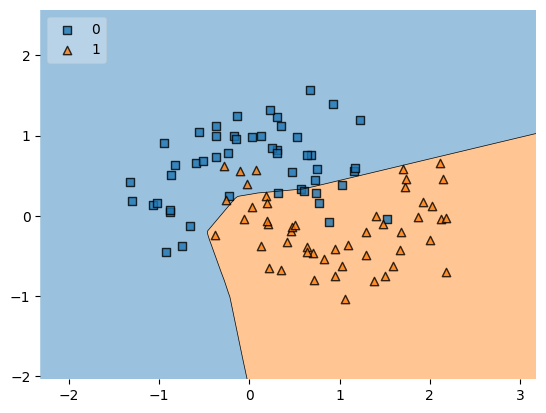

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)